In [ ]:
import numpy as np;
import matplotlib.pyplot as plt;

Tuneable parameters to change the experiment

In [ ]:
# Parameters for the testing of the bandit algorithm
num_runs = 200
num_steps = 5000
num_actions = 10
epsilon = 0.1
alpha = 0.1
q_walk_std = 0.1
reward_noise_std = 1

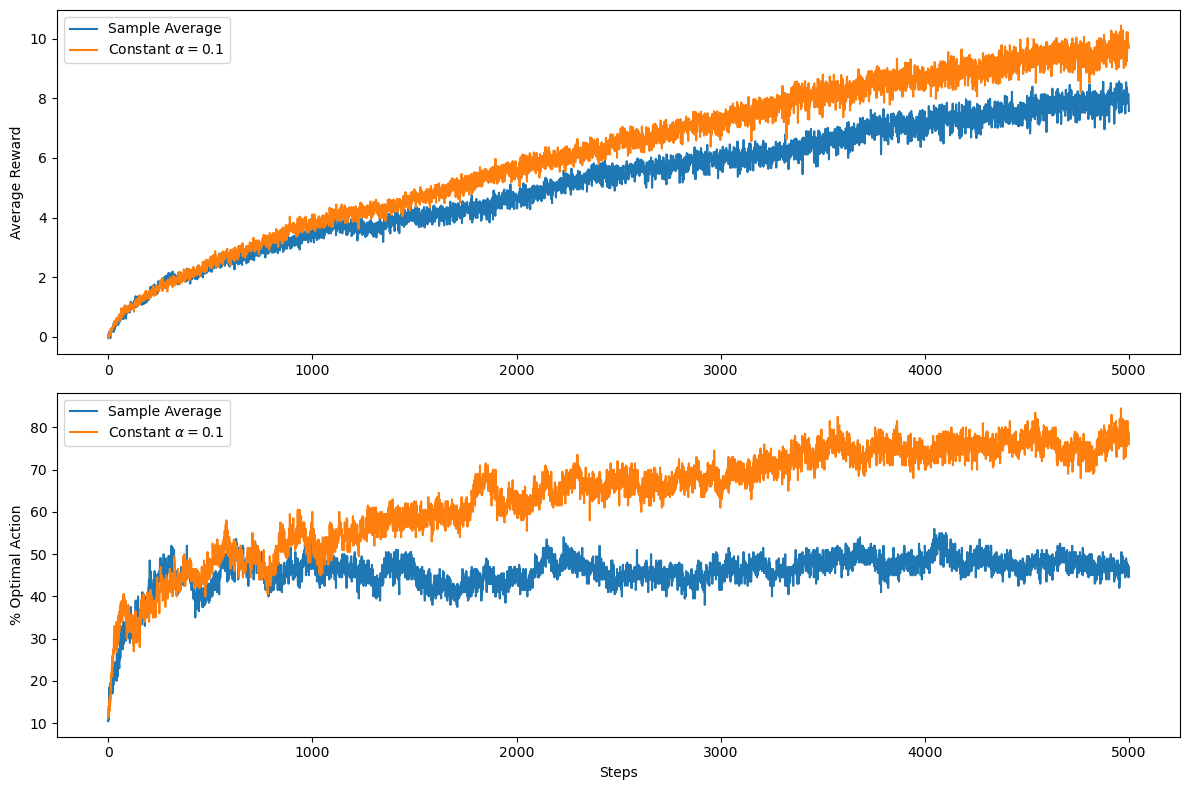

In [ ]:
# Storage for results
rewards_sample = np.zeros(num_steps)
rewards_const = np.zeros(num_steps)
optimal_sample = np.zeros(num_steps)
optimal_const = np.zeros(num_steps)

for run in range(num_runs):
    q_true = np.zeros(num_actions)
    Q_sample = np.zeros(num_actions)
    Q_const = np.zeros(num_actions)
    N_sample = np.zeros(num_actions)
    
    for step in range(num_steps):
        # Update q_true with random walk
        q_true += np.random.normal(0, q_walk_std, num_actions)
        optimal_action = np.argmax(q_true)
        
        # Sample-average agent
        if np.random.rand() < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(Q_sample)
        reward = q_true[action] + np.random.normal(0, reward_noise_std)
        N_sample[action] += 1
        Q_sample[action] += (reward - Q_sample[action]) / N_sample[action]
        rewards_sample[step] += reward
        optimal_sample[step] += (action == optimal_action)
        
        # Constant step-size agent
        if np.random.rand() < epsilon:
            action_const = np.random.randint(num_actions)
        else:
            action_const = np.argmax(Q_const)
        reward_const = q_true[action_const] + np.random.normal(0, reward_noise_std)
        Q_const[action_const] += alpha * (reward_const - Q_const[action_const])
        rewards_const[step] += reward_const
        optimal_const[step] += (action_const == optimal_action)

# Averaging
rewards_sample /= num_runs
rewards_const /= num_runs
optimal_sample = optimal_sample / num_runs * 100
optimal_const = optimal_const / num_runs * 100

# Plotting
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(rewards_sample, label='Sample Average')
plt.plot(rewards_const, label=r'Constant $\alpha=0.1$')
plt.ylabel('Average Reward')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(optimal_sample, label='Sample Average')
plt.plot(optimal_const, label=r'Constant $\alpha=0.1$')
plt.ylabel('% Optimal Action')
plt.xlabel('Steps')
plt.legend()

plt.tight_layout()
plt.show()

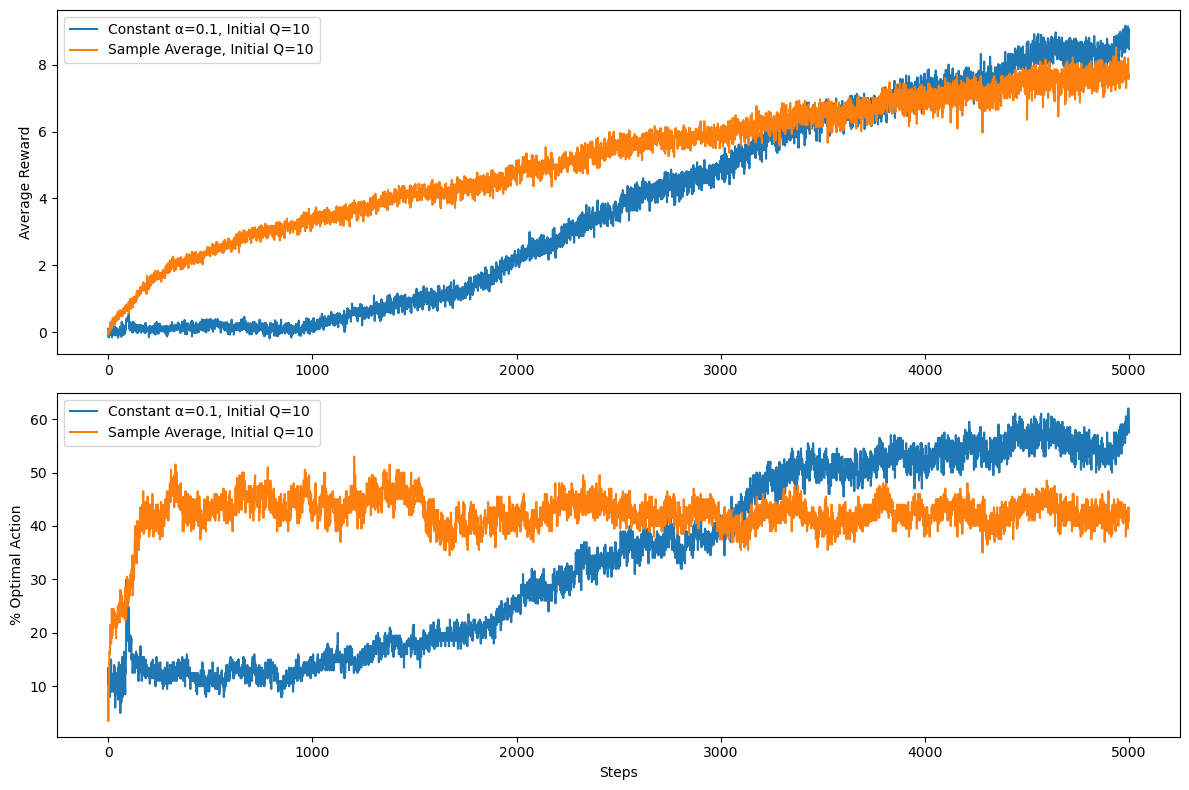

In [ ]:
# Define the range of initial values to test
initial_values = [10]

# Storage for results
results_const = {}
results_sample = {}

# Create a random number generator
rng = np.random.default_rng(123)

for initial_value in initial_values:
    rewards_const = np.zeros(num_steps)
    optimal_const = np.zeros(num_steps)
    rewards_sample = np.zeros(num_steps)
    optimal_sample = np.zeros(num_steps)
    
    for run in range(num_runs):
        q_true = np.zeros(num_actions)
        Q_const = np.full(num_actions, initial_value)
        Q_sample = np.zeros(num_actions)
        N_sample = np.zeros(num_actions)
        
        for step in range(num_steps):
            # Update q_true with random walk
            q_true += rng.normal(0, q_walk_std, num_actions)
            optimal_action = np.argmax(q_true)
            
            # Sample-average agent
            if rng.random() < epsilon:
                action_sample = rng.integers(num_actions)
            else:
                action_sample = np.argmax(Q_sample)
            reward_sample = q_true[action_sample] + rng.normal(0, reward_noise_std)
            N_sample[action_sample] += 1
            Q_sample[action_sample] += (reward_sample - Q_sample[action_sample]) / N_sample[action_sample]
            rewards_sample[step] += reward_sample
            optimal_sample[step] += (action_sample == optimal_action)
            
            # Constant step-size agent
            if rng.random() < epsilon:
                action_const = rng.integers(num_actions)
            else:
                action_const = np.argmax(Q_const)
            reward_const = q_true[action_const] + rng.normal(0, reward_noise_std)
            Q_const[action_const] += alpha * (reward_const - Q_const[action_const])
            rewards_const[step] += reward_const
            optimal_const[step] += (action_const == optimal_action)
    
    # Averaging
    rewards_const /= num_runs
    optimal_const = optimal_const / num_runs * 100
    rewards_sample /= num_runs
    optimal_sample = optimal_sample / num_runs * 100
    
    # Store results
    results_const[initial_value] = (rewards_const, optimal_const)
    results_sample[initial_value] = (rewards_sample, optimal_sample)

# Plotting
plt.figure(figsize=(12, 8))

# Plot average rewards
plt.subplot(2, 1, 1)
for initial_value in initial_values:
    plt.plot(results_const[initial_value][0], label=f'Constant α={alpha}, Initial Q={initial_value}')
    plt.plot(results_sample[initial_value][0], label=f'Sample Average, Initial Q={initial_value}')
plt.ylabel('Average Reward')
plt.legend()

# Plot percentage of optimal actions
plt.subplot(2, 1, 2)
for initial_value in initial_values:
    plt.plot(results_const[initial_value][1], label=f'Constant α={alpha}, Initial Q={initial_value}')
    plt.plot(results_sample[initial_value][1], label=f'Sample Average, Initial Q={initial_value}')
plt.ylabel('% Optimal Action')
plt.xlabel('Steps')
plt.legend()

plt.tight_layout()
plt.show()

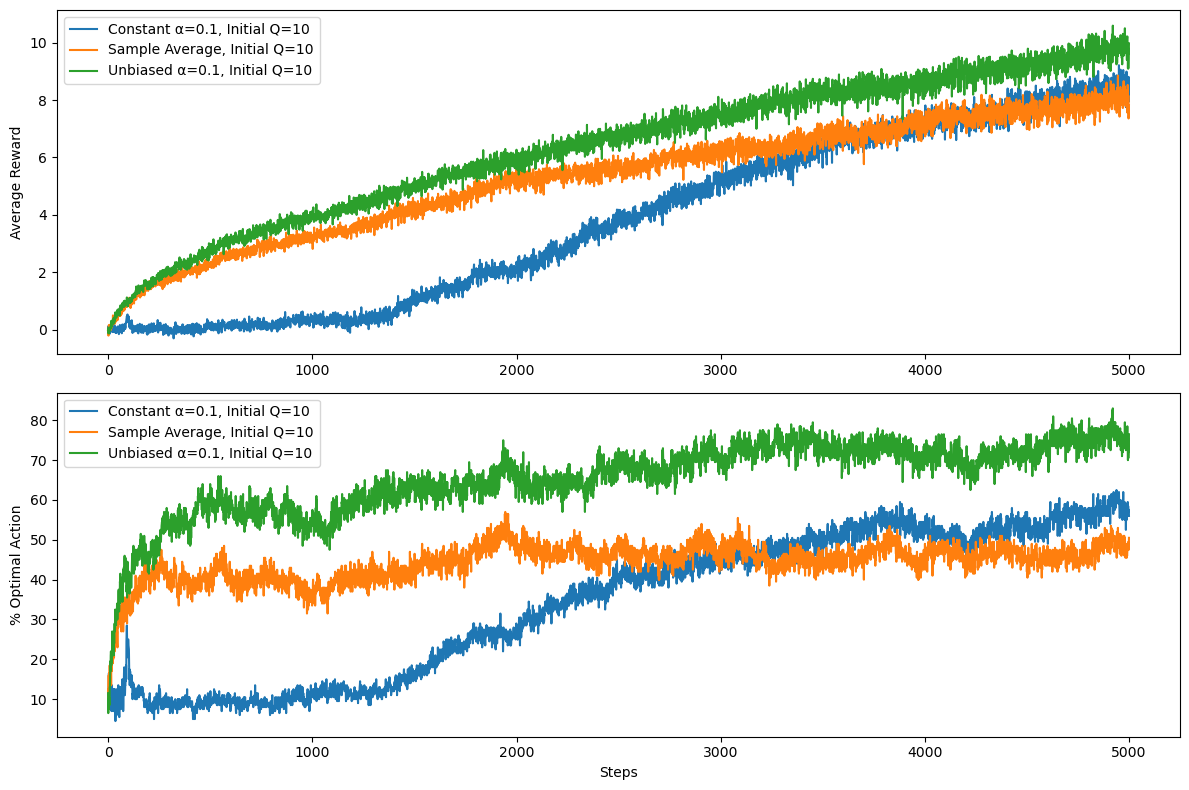

In [ ]:
# Define the range of initial values to test
initial_values = [10]

# Storage for results
results_const = {}
results_sample = {}
results_unbiased = {}

# Create a random number generator
rng = np.random.default_rng(123)

for initial_value in initial_values:
    rewards_const = np.zeros(num_steps)
    optimal_const = np.zeros(num_steps)
    rewards_sample = np.zeros(num_steps)
    optimal_sample = np.zeros(num_steps)
    rewards_unbiased = np.zeros(num_steps)
    optimal_unbiased = np.zeros(num_steps)
    
    for run in range(num_runs):
        q_true = np.zeros(num_actions)
        Q_const = np.full(num_actions, initial_value)
        Q_sample = np.zeros(num_actions)
        Q_unbiased = np.zeros(num_actions)
        N_sample = np.zeros(num_actions)
        O_unbiased = np.zeros(num_actions)
        
        for step in range(num_steps):
            # Update q_true with random walk
            q_true += rng.normal(0, q_walk_std, num_actions)
            optimal_action = np.argmax(q_true)
            
            # Sample-average agent
            if rng.random() < epsilon:
                action_sample = rng.integers(num_actions)
            else:
                action_sample = np.argmax(Q_sample)
            reward_sample = q_true[action_sample] + rng.normal(0, reward_noise_std)
            N_sample[action_sample] += 1
            Q_sample[action_sample] += (reward_sample - Q_sample[action_sample]) / N_sample[action_sample]
            rewards_sample[step] += reward_sample
            optimal_sample[step] += (action_sample == optimal_action)
            
            # Constant step-size agent
            if rng.random() < epsilon:
                action_const = rng.integers(num_actions)
            else:
                action_const = np.argmax(Q_const)
            reward_const = q_true[action_const] + rng.normal(0, reward_noise_std)
            Q_const[action_const] += alpha * (reward_const - Q_const[action_const])
            rewards_const[step] += reward_const
            optimal_const[step] += (action_const == optimal_action)
            
            # Unbiased constant step-size agent
            if rng.random() < epsilon:
                action_unbiased = rng.integers(num_actions)
            else:
                action_unbiased = np.argmax(Q_unbiased)
            reward_unbiased = q_true[action_unbiased] + rng.normal(0, reward_noise_std)
            O_unbiased[action_unbiased] += alpha * (1 - O_unbiased[action_unbiased])
            beta_n = alpha / O_unbiased[action_unbiased]
            Q_unbiased[action_unbiased] += beta_n * (reward_unbiased - Q_unbiased[action_unbiased])
            rewards_unbiased[step] += reward_unbiased
            optimal_unbiased[step] += (action_unbiased == optimal_action)
    
    # Averaging
    rewards_const /= num_runs
    optimal_const = optimal_const / num_runs * 100
    rewards_sample /= num_runs
    optimal_sample = optimal_sample / num_runs * 100
    rewards_unbiased /= num_runs
    optimal_unbiased = optimal_unbiased / num_runs * 100
    
    # Store results
    results_const[initial_value] = (rewards_const, optimal_const)
    results_sample[initial_value] = (rewards_sample, optimal_sample)
    results_unbiased[initial_value] = (rewards_unbiased, optimal_unbiased)

# Plotting
plt.figure(figsize=(12, 8))

# Plot average rewards
plt.subplot(2, 1, 1)
for initial_value in initial_values:
    plt.plot(results_const[initial_value][0], label=f'Constant α={alpha}, Initial Q={initial_value}')
    plt.plot(results_sample[initial_value][0], label=f'Sample Average, Initial Q={initial_value}')
    plt.plot(results_unbiased[initial_value][0], label=f'Unbiased α={alpha}, Initial Q={initial_value}')
plt.ylabel('Average Reward')
plt.legend()

# Plot percentage of optimal actions
plt.subplot(2, 1, 2)
for initial_value in initial_values:
    plt.plot(results_const[initial_value][1], label=f'Constant α={alpha}, Initial Q={initial_value}')
    plt.plot(results_sample[initial_value][1], label=f'Sample Average, Initial Q={initial_value}')
    plt.plot(results_unbiased[initial_value][1], label=f'Unbiased α={alpha}, Initial Q={initial_value}')
plt.ylabel('% Optimal Action')
plt.xlabel('Steps')
plt.legend()

plt.tight_layout()
plt.show()